In [10]:
# !pip install ezdxf
import ezdxf
import os

# Get path to work space with os
dir_path = os.path.realpath('.')

# Load the DXF document
doc = ezdxf.readfile(dir_path + "/dxf_files/spiral.dxf")

# Get the modelspace which contains the entities
modelspace = doc.modelspace()

# Open the output file
with open(dir_path + "/csv_files/coordinates.csv", "w") as file:
    # Write the headers to the file
    file.write("X,Y,Z\n")
    
    # Iterate over each entity in the modelspace
    for entity in modelspace:
        # Check if the entity is a line
        if entity.dxftype() == 'LINE':
            # Write the start and end points of the line to the file
            file.write(f"{entity.dxf.start.x},{entity.dxf.start.y},{entity.dxf.start.z}\n")
            file.write(f"{entity.dxf.end.x},{entity.dxf.end.y},{entity.dxf.end.z}\n")

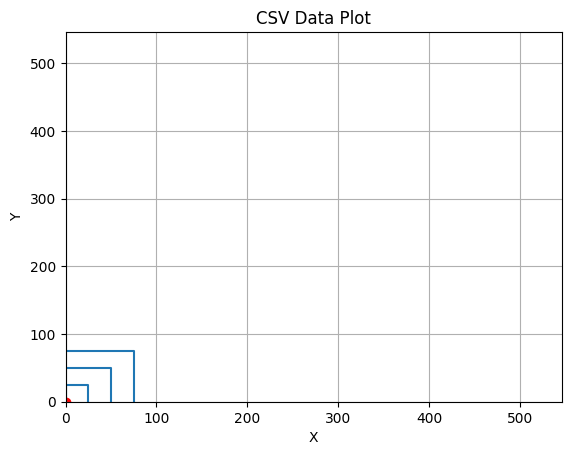

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv(dir_path + "/csv_files/coordinates.csv")

# Get the 'X' and 'Y' columns
x = data['X']
y = data['Y']

# Print Cell visualization for data grid conversion
# Filament Extruder default size 1.75mm
cell_size = 1.75 # mm
# Build volume size 21.5 inch x 21.5 inch x 20 inch
build_dim = 21.5 * 25.4 # mm
# Create a grid of cells

# convert x y coordinate data to cell size
x = x / cell_size
y = y / cell_size

# Plot the data on a 2D XY plane
plt.plot(x, y)
# Add a red dot for the first point
plt.scatter(x.iloc[0], y.iloc[0], color='red')
# Add a blue dot for the last point
plt.scatter(x.iloc[-1], y.iloc[-1], color='blue')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, build_dim)
plt.ylim(0, build_dim)
plt.title('CSV Data Plot')
plt.show()

In [14]:
# Take pandas data frame and convert to XML
xml_data = data.to_xml()
# Lets name the first index as 'Starting Point'
xml_data = data.to_xml(index='Starting Point')


print(xml_data)


<?xml version='1.0' encoding='utf-8'?>
<data>
  <row>
    <index>0</index>
    <X>0.0</X>
    <Y>0.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>1</index>
    <X>0.0</X>
    <Y>25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>2</index>
    <X>0.0</X>
    <Y>25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>3</index>
    <X>25.0</X>
    <Y>25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>4</index>
    <X>25.0</X>
    <Y>25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>5</index>
    <X>25.0</X>
    <Y>-25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>6</index>
    <X>25.0</X>
    <Y>-25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>7</index>
    <X>-25.0</X>
    <Y>-25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>8</index>
    <X>-25.0</X>
    <Y>-25.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>9</index>
    <X>-25.0</X>
    <Y>50.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <index>10</index>
    <X>-25.0</X>
    <Y>50.0</Y>
    <Z>0.0</Z>
  </row>
  <row>
    <i